# **Importing Dependancies**

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud # visualize the most common words
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# **Importing DataSet**

In [79]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

# **Knowing DataSet**

In [80]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Dropping Unnecessary columns**

In [81]:
df.drop(['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],inplace=True,axis=1)

In [82]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Renaming Columns**

In [83]:
df.columns = ['labels','data']

In [84]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Label Encoding the Categorical Feature-labels:spam/not spam**

In [85]:
df['labels'] = df['labels'].map({"ham":0,"spam":1})

In [86]:
df.head()

,labels,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Checking for class imbalance**

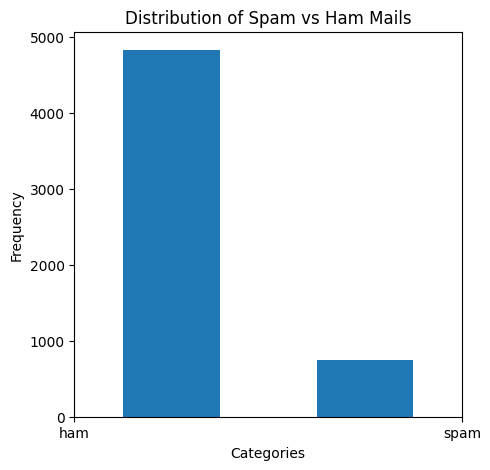

In [87]:
plt.figure(figsize=(5,5))
plt.hist(df.labels,bins=2,rwidth=0.5)
plt.xticks(range(0,2),['ham','spam'])
plt.title('Distribution of Spam vs Ham Mails')
plt.xlabel('Categories')
plt.ylabel('Frequency');

There is class imbalance

# **Splitting Data**

In [88]:
df_train, df_test, y_train, y_test = train_test_split(df['data'],df['labels'],test_size=0.2)

# **Vectorizing the text**
1. CountVectorizer
2. TF-IDF Vectorizer

In [89]:
# Count Vectorizer
count_featurizer = CountVectorizer(decode_error='ignore',stop_words='english',analyzer='word')
X_train = count_featurizer.fit_transform(df_train)
X_test = count_featurizer.transform(df_test)

In [90]:
# TF-IDF Vectorizer
tfidf_featurizer = TfidfVectorizer(decode_error='ignore',stop_words='english')
X_train1 = tfidf_featurizer.fit_transform(df_train)
X_test1 = tfidf_featurizer.transform(df_test)

# **Creating the model**

In [104]:
models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier(),
          'Decision Tree Classifier':DecisionTreeClassifier(),
          'Support Vector Classifier':svm.SVC(),
          'Naive Bayes Classifier': MultinomialNB()}

def fit_and_score(models,X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine models.
    models: a dict of different Scikit-Learn machine learning models
    '''

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)*100

    return model_scores

In [105]:
model_score = fit_and_score(models,X_train,X_test,y_train,y_test);
model_score

{'Logistic Regression': 97.13004484304932,
 'KNN': 90.31390134529148,
 'Random Forest': 96.32286995515696,
 'Decision Tree Classifier': 96.7713004484305,
 'Support Vector Classifier': 97.13004484304932,
 'Naive Bayes Classifier': 98.20627802690582}

<Axes: >

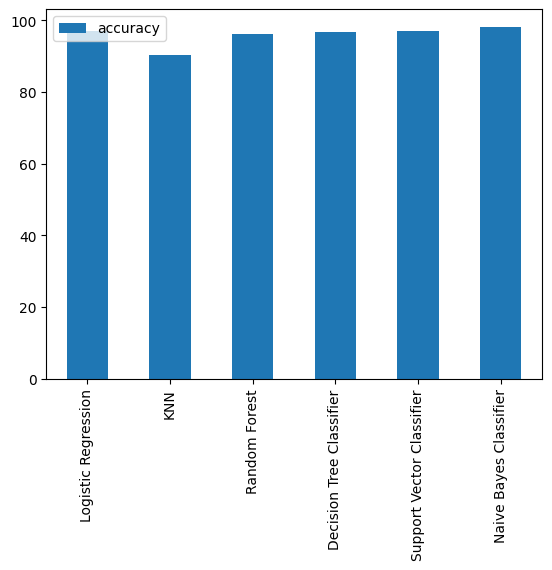

In [107]:
model_comparison = pd.DataFrame(model_score,index=['accuracy'])
model_comparison.T.plot.bar()

**Naive Bayes Classifier produces more accuracy**

In [106]:
model = MultinomialNB()
model.fit(X_train,y_train)
print("train accuracy: ",model.score(X_train,y_train))
print("test accuracy: ",model.score(X_test,y_test))

train accuracy:  0.9946152120260264
test accuracy:  0.9820627802690582


**F1-Scores**

In [93]:
Ptrain = model.predict(X_train)
Ptest = model.predict(X_test)
print("train F1: ",f1_score(y_train,Ptrain))
print("test F1: ",f1_score(y_test,Ptest))

train F1:  0.9681309216192937
test F1:  0.9160839160839161


**AUC Scores**

In [94]:
prob_train = model.predict_proba(X_train)[:,1]
prob_test = model.predict_proba(X_test)[:,1]
print("train AUC: ",roc_auc_score(y_train,prob_train))
print("test AUC: ",roc_auc_score(y_test,prob_test))

train AUC:  0.9935754124208693
test AUC:  0.9730409142173848


Since the F1-scores are good there is no need to do class balancing

**Confusion Matrix**

In [95]:
def plot_confusion_matrix(y_true,y_preds):
  cm = confusion_matrix(y_true,y_preds)
  classes = ['ham','spam']
  ax = sns.heatmap(cm,annot=True,fmt='g',xticklabels=classes,yticklabels=classes)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target");

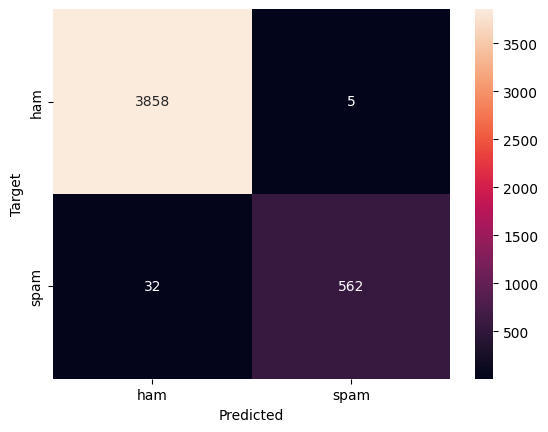

In [96]:
plot_confusion_matrix(y_train,Ptrain)

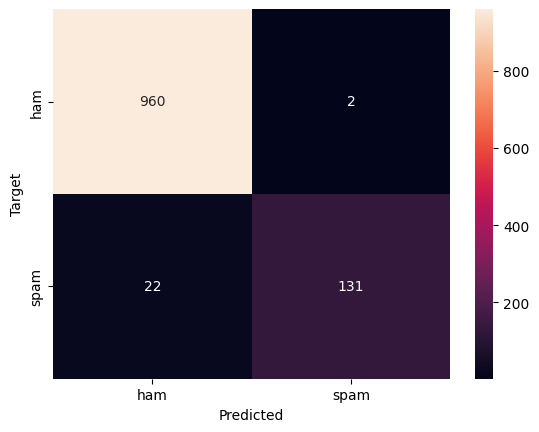

In [97]:
plot_confusion_matrix(y_test,Ptest)

# **Visualizing the data**

In [98]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ''
  wordcloud = WordCloud(width=600,height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

**Visualizing Spam Wordcloud**

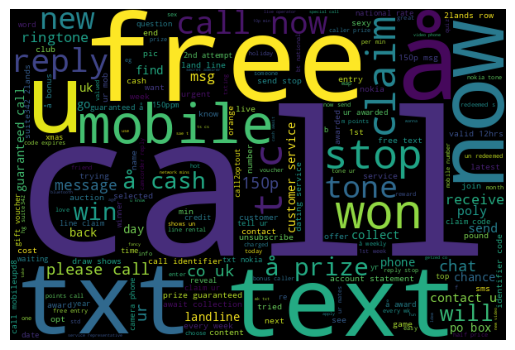

In [99]:
visualize(1)

**Visualizing Ham Wordcloud**

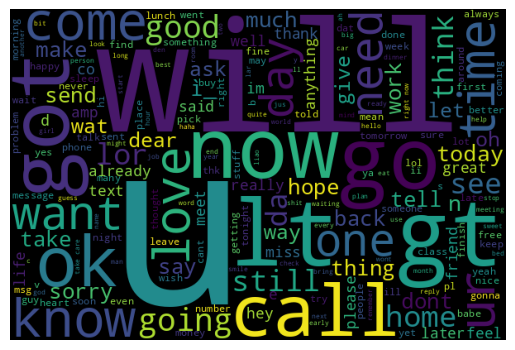

In [100]:
visualize(0)

# **Creating the final model**
* Naive Bayes Classifier

In [109]:
final_model = MultinomialNB()

In [110]:
X = df.data
y = df.labels

In [112]:
X = count_featurizer.transform(X)

In [113]:
final_model.fit(X,y)

MultinomialNB()

# **Dumping the model into a joblib model**

In [115]:
import joblib
joblib.dump(final_model,"spam_model.joblib")

['spam_model.joblib']